# Real World Data Is Not Normal Distributed
Look at `diamonds`, `txhousing` and

In [36]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF

# import datasets
from plotnine.data import diamonds, txhousing
from sklearn.datasets import load_boston, load_diabetes, load_iris
from statsmodels.datasets import fair

boston = load_boston(return_X_y=True)[1]
diabetes = load_diabetes(return_X_y=True)[1]
iris = load_iris()['data']

affairs = fair.load_pandas()

Text(0.5, 1.0, 'CDF of diamonds price')

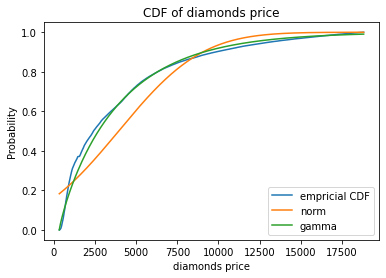

In [3]:
y = np.sort(diamonds['price'])
ecdf = ECDF(y)
plt.plot(y, ecdf(y), label='empricial CDF')

DISTRIBUTIONS = [stats.norm, stats.gamma]#, stats.poisson, ]

for dist in DISTRIBUTIONS:
    params = dist.fit(y)
    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Calculate fitted PDF and error with fit in distribution
    plt.plot(y, dist.cdf(y, loc=loc, scale=scale, *arg), label=dist.name)

plt.legend()
plt.xlabel('diamonds price')
plt.ylabel('Probability')
plt.title('CDF of diamonds price')

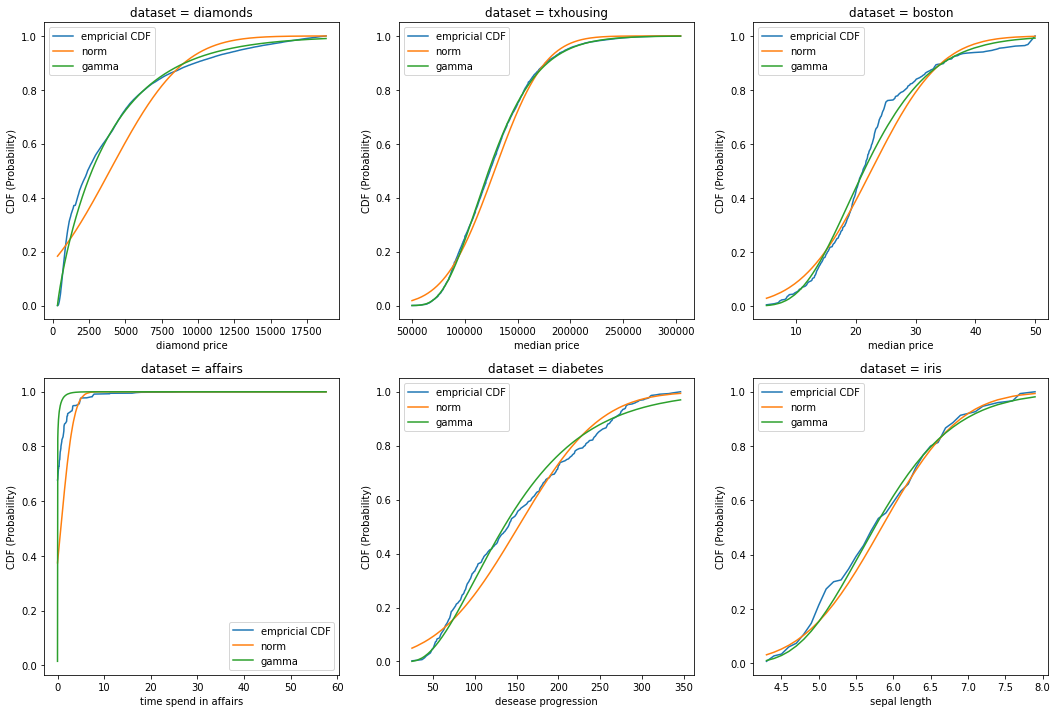

In [52]:
DISTRIBUTIONS = [stats.norm, stats.gamma] # maybe add stats.invgauss

fig, axes = plt.subplots(2, 3, figsize=(6*3, 6*2))
for (name, target, y), ax in zip([['diamonds', 'diamond price', diamonds['price']],
                                  ['txhousing', 'median price', txhousing['median']],
                                  ['boston', 'median price', boston],
                                  ['affairs', 'time spend in affairs', affairs.data['affairs']],
                                  ['diabetes', 'desease progression', diabetes],
                                  ['iris', 'sepal length', iris[:, 0]]],
                                 axes.flat):
    y = np.sort(pd.Series(y).dropna())  # txhousing has NA valeus
    ecdf = ECDF(y)
    ax.plot(y, ecdf(y), label='empricial CDF')
    for dist in DISTRIBUTIONS:
        #fit distribution to data
        params = dist.fit(y)
        # Separate parts of parameters
        arg = params[:-2]
        loc = params[-2]
        scale = params[-1]
        ax.plot(y, dist.cdf(y, loc=loc, scale=scale, *arg), label=dist.name)
    
    ax.legend()
    ax.set_xlabel(target)
    ax.set_ylabel("CDF (Probability)")
    ax.set_title("dataset = " + name)

Sometimes, Gamma is clearly better (diamonds, txhousing, diabetes, boston), other times its more or less even at first sight (affairs, iris).

## Poisson (without overdispersion) becomes sharper as $\mu$ increases.
Reason: $Std[Y] = \sqrt{Var[Y]} = \sqrt{\mu}$

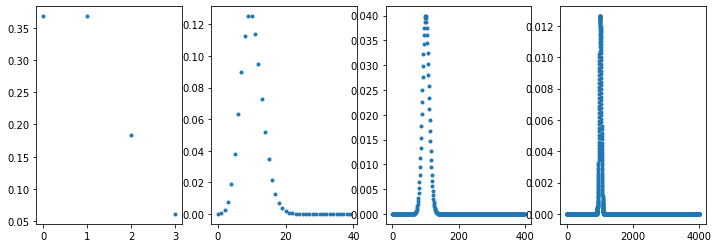

In [84]:
fig, axes = plt.subplots(1, 4, figsize=(12, 4))
for i, mu in enumerate([1, 10, 100, 1000]):
    x = np.arange(0, 4*mu)
    axes[i].plot(x, stats.poisson.pmf(x, mu=mu), '.')